<a href="https://colab.research.google.com/github/edeery3/Stock_prediction/blob/main/Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
gsk = pd.read_excel('/Stockdataset.xlsx', engine = 'openpyxl', sheet_name = 'GSK')

In [7]:
def convert_volume(val):
    val = str(val).strip().upper()
    if 'M' in val:
        return float(val.replace('M', '')) * 1000000
    elif 'K' in val:
        return float(val.replace('K', '')) * 1000
    elif val.replace('.', '', 1).isdigit():
        return float(val)
    else:
        return 0

In [8]:
gsk.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,1
Change %,0


In [9]:
gsk['Vol.'] = gsk['Vol.'].apply(convert_volume)

In [11]:
gsk.drop('Date', axis = 1).describe()

,Price,Open,High,Low,Vol.,Change %
count,2527.000000,2527.000000,2527.000000,2527.000000,2.527000e+03,2527.000000
mean,1516.391286,1516.399632,1530.648627,1502.953221,7.011167e+06,0.000068
std,137.163824,136.753475,137.508894,135.948140,3.590257e+06,0.013074
min,1202.780000,1213.080000,1227.620000,1202.780000,0.000000e+00,-0.100600
25%,1404.840000,1403.995000,1418.580000,1389.955000,4.820000e+06,-0.006750
50%,1510.550000,1511.800000,1525.400000,1496.510000,6.130000e+06,0.000100
75%,1625.495000,1624.380000,1638.575000,1611.070000,8.020000e+06,0.007100
max,1864.580000,1864.370000,1875.690000,1846.600000,4.366000e+07,0.076100


In [12]:
gsk['Date'] = pd.to_datetime(gsk['Date'])
gsk.set_index('Date', inplace=True)
gsk.sort_index(inplace=True)


In [13]:
gsk['SMA_20'] = gsk['Price'].rolling(window=20).mean()
gsk['Volatility_20'] = gsk['Price'].rolling(window=20).std()

In [15]:
train_start = '2015-04-01'
train_end = '2023-04-01'

# Use index-based slicing
train_close = gsk[train_start:train_end]
test_close = gsk[train_end:]

print(f"Train size: {len(train_close)}, Test size: {len(test_close)}")

Train size: 2022, Test size: 505


Exploratory Data Analysis Plots

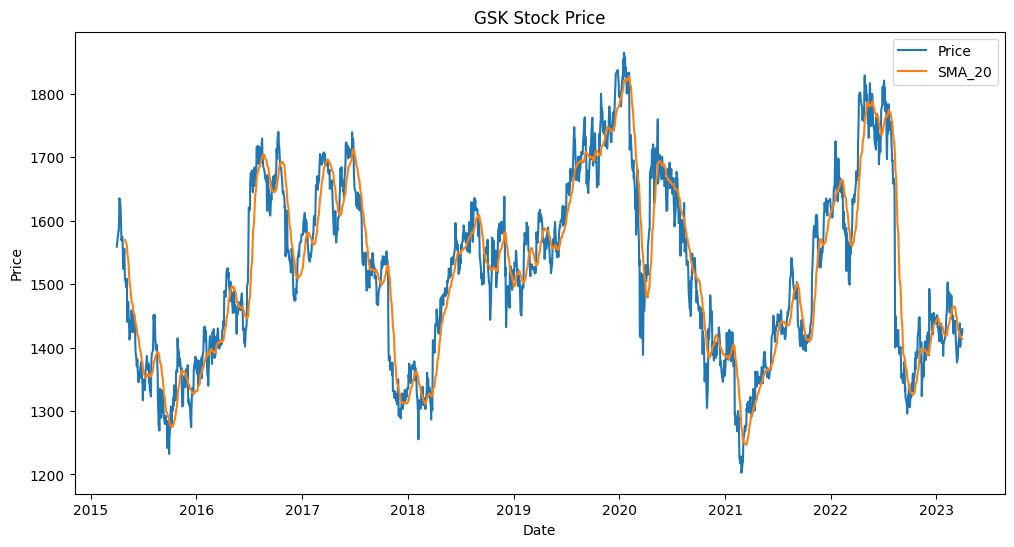

In [17]:
plt.figure(figsize = (12,6))
plt.plot(train_close['Price'])
plt.plot(train_close['SMA_20'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GSK Stock Price')
plt.legend(['Price', 'SMA_20'])
plt.show()

In [18]:
fig = go.Figure(data=[go.Candlestick(
    open=train_close['Open'],
    high=train_close['High'],
    low=train_close['Low'],
    close=train_close['Price'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

fig.update_layout(title='Candlestick Chart Example', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [19]:
gsk_mean = np.mean(train_close['Price'])

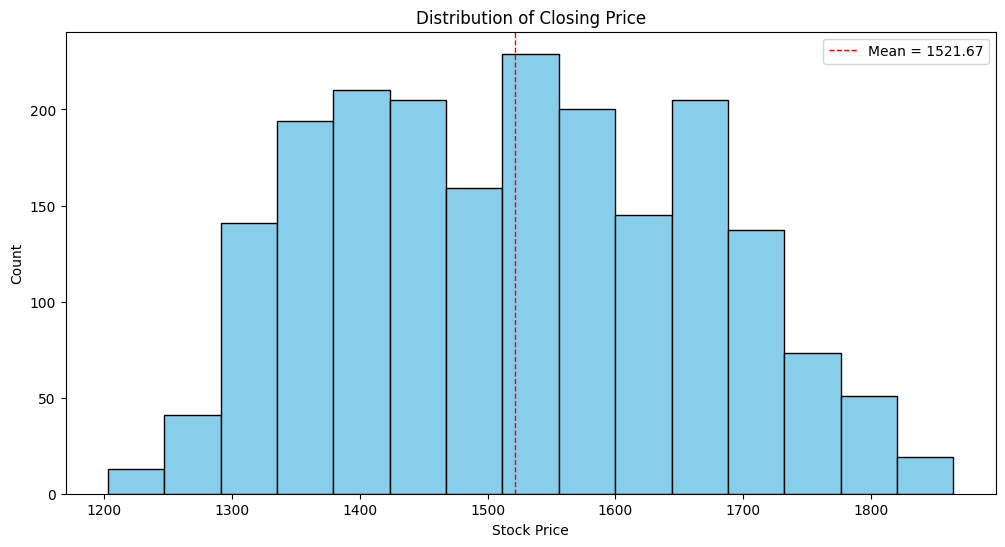

In [20]:
plt.figure(figsize = (12,6))
plt.hist(train_close['Price'], bins = 15, lw = 2, edgecolor = 'black', color = 'skyblue')
plt.xlabel('Stock Price')
plt.ylabel('Count')
plt.title('Distribution of Closing Price')
plt.axvline(gsk_mean, color='red', linestyle='--', linewidth=1, label=f'Mean = {gsk_mean:.2f}')
plt.legend()